Name: Muley, Tushar
Assignment: Week 3 Exercises 2-4
Date: Sept. 20,2020

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

In [13]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [36]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [2]:
#Read nsfg into df preg
    preg = nsfg.ReadFemPreg()
#Take df preg and get only live births and put into df live
    live = preg[preg.outcome == 1]

In [3]:
#Take a look at df live
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2734.687353,4258.980140,7772.212858,2,28,NaN,6.3750
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2580.967613,2925.167116,5075.164946,2,61,NaN,6.3750
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,6.1875
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,7.5000


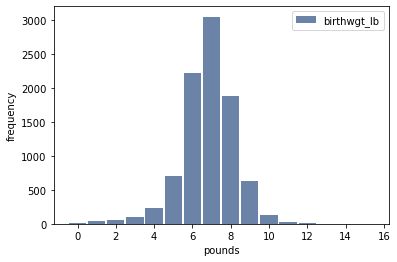

<Figure size 576x432 with 0 Axes>

In [6]:
#Histogram of live births
    import thinkstats2
    import thinkplot
    hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
    thinkplot.Hist(hist)
    thinkplot.Show(xlabel='pounds', ylabel='frequency')

In [19]:
#Split first order and others
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [17]:
#View first order
firsts.birthwgt_lb

0        8.0
2        9.0
5        8.0
8        7.0
10       7.0
        ... 
13576    6.0
13578    6.0
13581    6.0
13584    6.0
13588    6.0
Name: birthwgt_lb, Length: 4413, dtype: float64

In [30]:
#Use hist from thinkstats to remove nan
first_hist = thinkstats2.Hist(firsts.birthwgt_lb)    
other_hist = thinkstats2.Hist(others.birthwgt_lb)

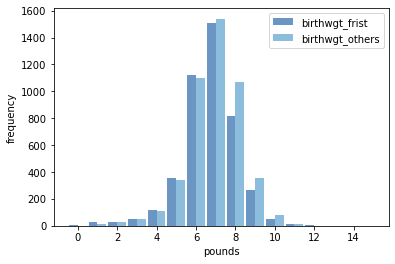

<Figure size 576x432 with 0 Axes>

In [34]:
#Build the histogram for first order and others
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width, label='birthwgt_frist')
thinkplot.Hist(other_hist, align='left', width=width, label='birthwgt_others')
thinkplot.Show(xlabel='pounds', ylabel='frequency')

Tushar - > It appears very close between the two groups

In [40]:
# Cohen's d

CohenEffectSize(firsts.birthwgt_lb, others.birthwgt_lb)

-0.10845024254407831

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

Tushar-> The totalwgt_lb between firsts and others is a negative effect of -0.10845024254407831. The mean is decreased between the two groups. First order babies have lower weights compared to other orders.

For the next few exercises, we'll load the respondent file: